In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## Loading Dataset

In [46]:
df= pd.read_csv('movies.csv',encoding = 'latin1')

In [47]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [48]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [49]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [50]:
df.isnull().sum().sum()

33523

In [51]:
df.shape

(15509, 10)

In [52]:
# import ydata_profiling as pandas_profiling  # Use ydata_profiling instead of pandas_profiling
# # Generate a Pandas Profiling Report for initial data exploration
# report = pandas_profiling.ProfileReport(df)
# display(report)

Data Cleaning

In [53]:
df.dropna(inplace = True)

In [54]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [57]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [58]:
df.isnull().sum().sum()

0

In [59]:
df.shape

(5659, 10)

In [60]:
dup_data = df.duplicated().any()
print("Are there any duplicated data in the dataset ?",dup_data)

Are there any duplicated data in the dataset ? False


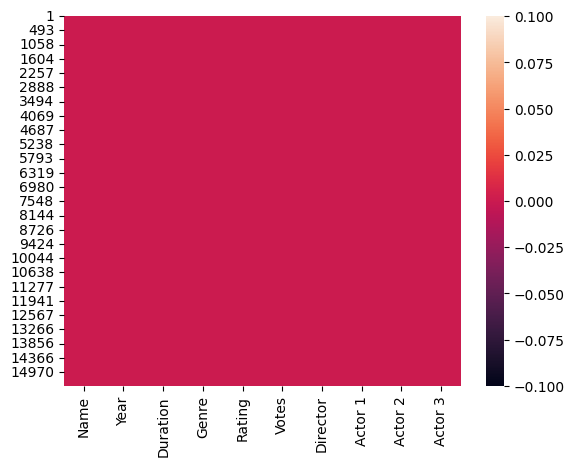

In [61]:
sns.heatmap(df.isnull())
plt.show()

In [62]:
df['Year'].head()

1    (2019)
3    (2019)
5    (1997)
6    (2005)
8    (2012)
Name: Year, dtype: object

In [63]:
genre = df['Genre']

In [64]:
genre.head()

1                        Drama
3              Comedy, Romance
5       Comedy, Drama, Musical
6          Drama, Romance, War
8    Horror, Mystery, Thriller
Name: Genre, dtype: object

In [65]:
genre.str.split(',',expand=True)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
...,...,...,...
15493,Drama,None,None
15494,Biography,Drama,History
15503,Action,Crime,Drama
15505,Action,Drama,None


In [66]:
# df_rating = pd.DataFrame(pd.np.empty((0, 4)))
df_rating = pd.read_csv("movies.csv",encoding='latin1',usecols = ['Name','Year','Genre','Rating'])
# df_rating = pd.DataFrame('movies.csv',columns = ['Name','Year','Genre','Rating'])
df_rating.dropna(inplace=True)

df_rating.head()

,Name,Year,Genre,Rating
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0
3,#Yaaram,(2019),"Comedy, Romance",4.4
5,...Aur Pyaar Ho Gaya,(1997),"Comedy, Drama, Musical",4.7
6,...Yahaan,(2005),"Drama, Romance, War",7.4
8,?: A Question Mark,(2012),"Horror, Mystery, Thriller",5.6


In [67]:
genresPie = df['Genre'].value_counts()

In [68]:
genresPie.head()

Drama                   844
Drama, Romance          332
Action, Crime, Drama    329
Action, Drama           206
Comedy, Drama           205
Name: Genre, dtype: int64

In [69]:
genre_counts = {}
for genre in genre.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 170
Action, Adventure: 17
Action, Adventure, Biography: 1
Action, Adventure, Comedy: 37
Action, Adventure, Crime: 9
Action, Adventure, Drama: 43
Action, Adventure, Family: 2
Action, Adventure, Fantasy: 11
Action, Adventure, History: 1
Action, Adventure, Horror: 1
Action, Adventure, Musical: 3
Action, Adventure, Mystery: 1
Action, Adventure, Romance: 5
Action, Adventure, Sci-Fi: 6
Action, Adventure, Thriller: 18
Action, Biography, Crime: 8
Action, Biography, Drama: 12
Action, Comedy: 24
Action, Comedy, Crime: 74
Action, Comedy, Drama: 118
Action, Comedy, Fantasy: 4
Action, Comedy, Horror: 1
Action, Comedy, Musical: 7
Action, Comedy, Mystery: 2
Action, Comedy, Romance: 27
Action, Comedy, Thriller: 6
Action, Comedy, War: 1
Action, Crime: 18
Action, Crime, Drama: 329
Action, Crime, Family: 1
Action, Crime, Fantasy: 1
Action, Crime, History: 1
Action, Crime, Horror: 1
Action, Crime, Musical: 3
Action, Crime, Mystery: 4
Action, Crime, Romance: 10
Action, Crime, Sci-Fi: 1
Action, Crim

In [70]:
df["Director"].nunique()

2431

In [71]:
directors = df["Director"].value_counts()

In [72]:
directors.head()

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Name: Director, dtype: int64

In [73]:
actors = pd.concat([df['Actor 1'],df['Actor 2'],df['Actor 3']]).dropna().value_counts()

In [74]:
actors.head()

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
dtype: int64

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

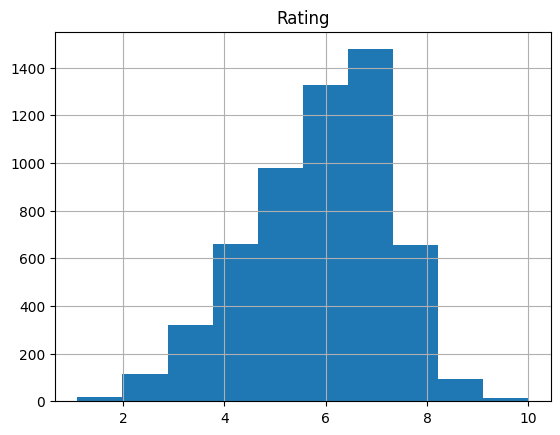

In [75]:
df.hist(column=['Rating'])

In [79]:
# ax = sns.boxplot(data=df, y='Year')
# ax.set_ylabel('Year')
# ax.set_title('Box Plot of Year')
# plt.show()

In [80]:
year_with_best_rating = df.groupby('Year')['Rating'].mean().idxmax()
print(f"Year with the best average rating: {year_with_best_rating}")


Year with the best average rating: 1952


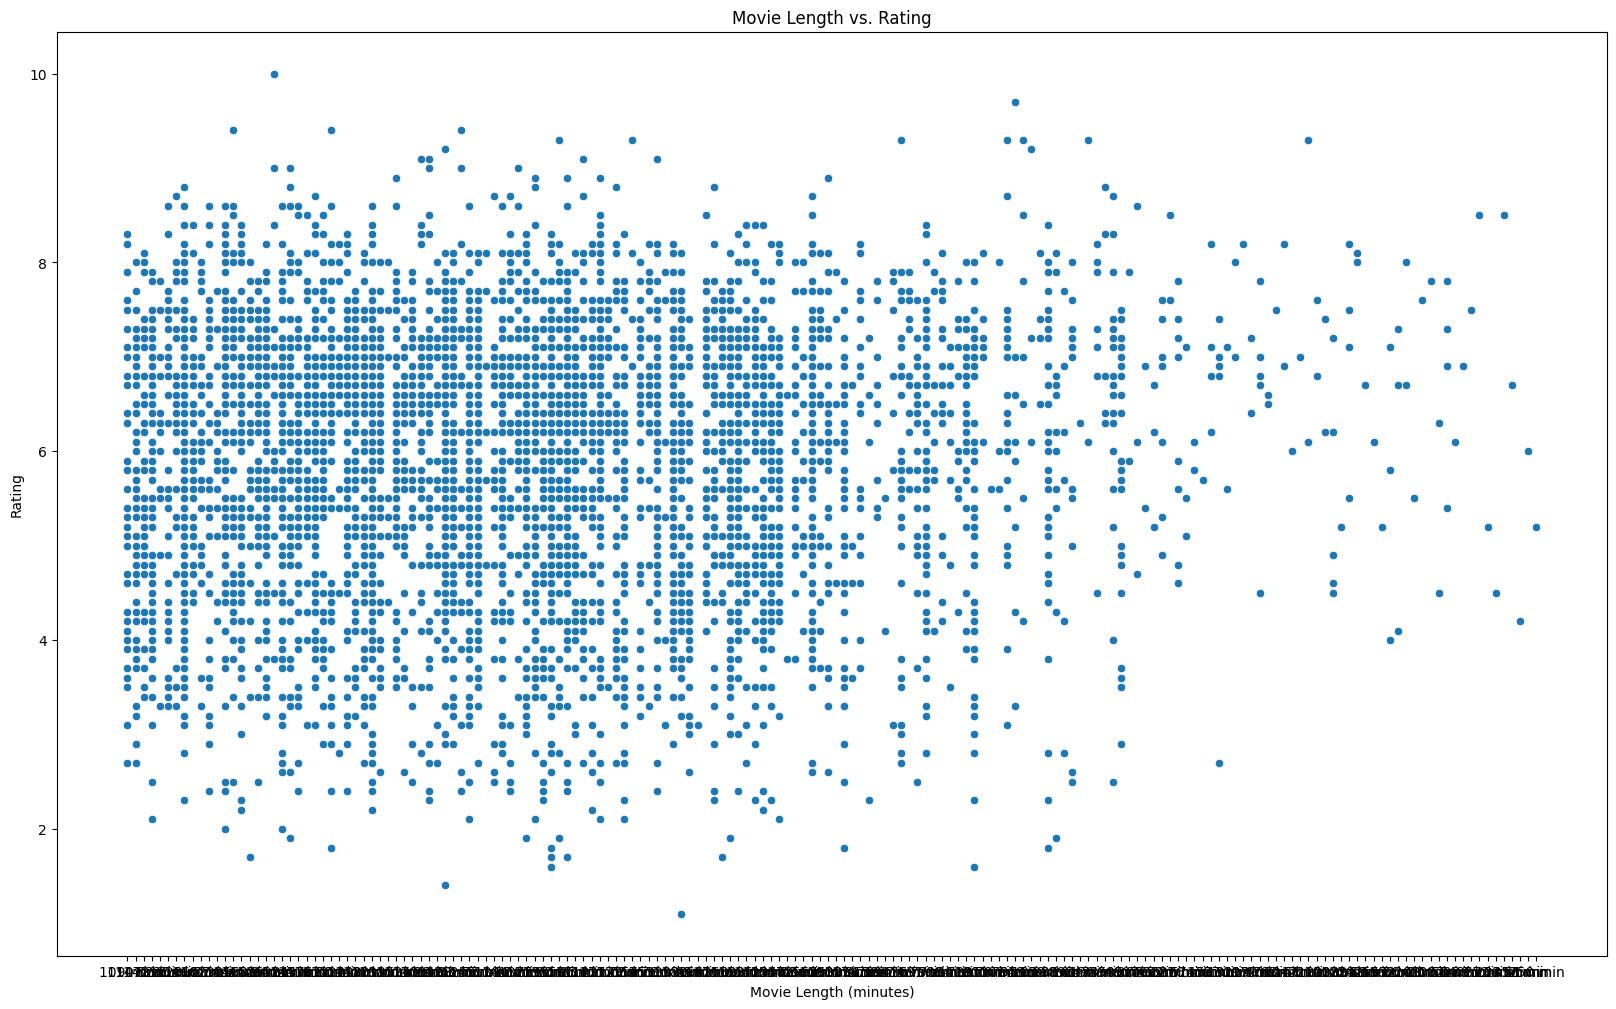

In [81]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Duration', y='Rating', data=df)
plt.title('Movie Length vs. Rating')
plt.xlabel('Movie Length (minutes)')
plt.ylabel('Rating')
plt.show()


In [82]:
top_10_movies = df.nlargest(10, 'Rating')
print("Top 10 Movies According to Rating:")
print(top_10_movies[['Name', 'Year', 'Rating']])


Top 10 Movies According to Rating:
                      Name  Year  Rating
8339       Love Qubool Hai  2020    10.0
5410            Half Songs  2021     9.7
5077          Gho Gho Rani  2019     9.4
6852                  June  2021     9.4
14222  The Reluctant Crime  2020     9.4
1314          Ashok Vatika  2018     9.3
1729              Baikunth  2021     9.3
5125           God of gods  2019     9.3
8344          Love Sorries  2021     9.3
11843              Refl3ct  2021     9.3


In [83]:
popular_movies_by_year = df[df['Rating'] >= df['Rating'].quantile(0.75)] #What does it do
popular_movies_count = popular_movies_by_year.groupby('Year').size()
print("Number of Popular Movies Released Each Year:")
print(popular_movies_count)


Number of Popular Movies Released Each Year:
Year
1934     1
1935     1
1936     1
1937     2
1938     1
        ..
2017    62
2018    76
2019    96
2020    48
2021    29
Length: 87, dtype: int64


In [84]:
best_rated_movies_by_year = df.groupby('Year').apply(lambda x: x.nlargest(1, 'Rating'))
best_rated_movies_overall = df.nlargest(1, 'Rating')

print("Number of Votes for Best-Rated Movies Per Year:")
print(best_rated_movies_by_year[['Name', 'Year', 'Rating']])
print("\nNumber of Votes for Best-Rated Movie Overall:")
print(best_rated_movies_overall[['Name', 'Year', 'Rating']])


Number of Votes for Best-Rated Movies Per Year:
                              Name  Year  Rating
Year                                            
1931 14161  The Light of the World  1931     6.2
1932 6073               Indrasabha  1932     6.0
1933 4658                     Fate  1933     6.2
1934 9053                  Mazdoor  1934     8.5
1935 6087                 Inquilab  1935     7.4
...                            ...   ...     ...
2017 11841     Rediscovering India  2017     9.0
2018 1314             Ashok Vatika  2018     9.3
2019 5077             Gho Gho Rani  2019     9.4
2020 8339          Love Qubool Hai  2020    10.0
2021 5410               Half Songs  2021     9.7

[91 rows x 3 columns]

Number of Votes for Best-Rated Movie Overall:
                 Name  Year  Rating
8339  Love Qubool Hai  2020    10.0


In [85]:

most_prolific_director = df['Director'].value_counts().idxmax()
print(f"Director with the most movies: {most_prolific_director}")


Director with the most movies: David Dhawan


In [86]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()

In [87]:
df['Actors'] = df['Actor 1'] +',' + df['Actor 2'] + ',' + df['Actor 3']

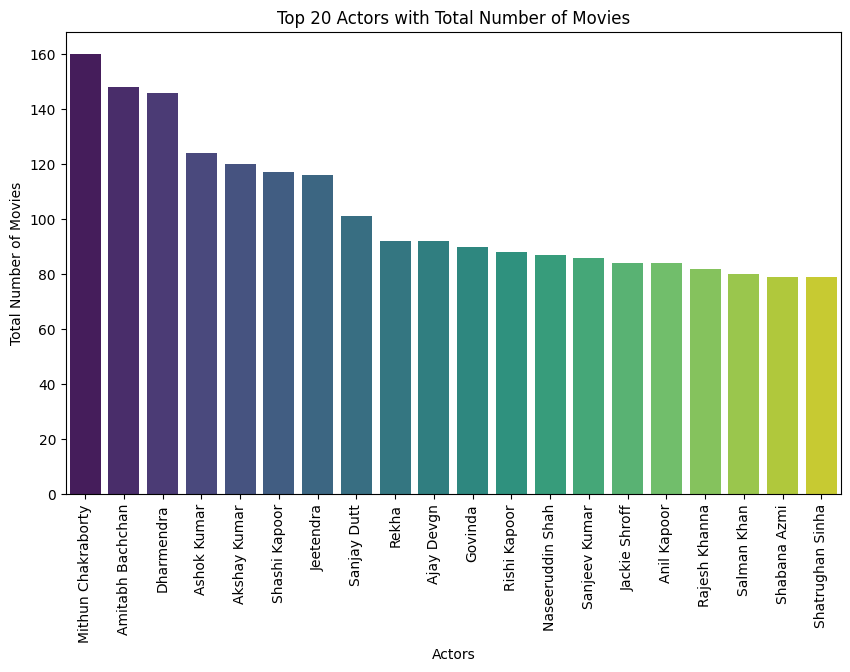

In [88]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [89]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal,Vivek Ghamande,Arvind Jangid"
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik,Ishita Raj,Siddhant Kapoor"
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor"
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma"
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave,Muntazir Ahmad,Kiran Bhatia"


In [90]:
most_prolific_actor = df['Actors'].str.split(',').explode().str.strip().value_counts().idxmax()
print(f"Actor who starred in the most movies: {most_prolific_actor}")


Actor who starred in the most movies: Mithun Chakraborty


In [91]:
df["Actor"] = df['Actors'].astype('category').cat.codes

In [101]:
df['Duration'] = df['Duration'].str.extract('(\d+)')
# df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True)
df['Votes']= df['Votes'].str.replace(r'\,|\)','',regex=True)

In [102]:
X = df.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3','Actors'], axis=1)
Y = df['Rating']

In [103]:
X.head()

,Year,Duration,Votes,Actor
1,2019,109,8,3875
3,2019,110,35,3343
5,1997,147,827,1119
6,2005,142,1086,2086
8,2012,82,326,5562


In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [106]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*1000))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*1000, 2)

In [107]:
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

In [108]:
RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

In [110]:
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)

# XGBR = XGBRegressor(n_estimators=100, random_state=1)
# XGBR.fit(x_train, y_train)
# xgb_preds = XGBR.predict(x_test)

GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

# LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
# LGBMR.fit(x_train, y_train)
# lgbm_preds = LGBMR.predict(x_test)

# CBR = CatBoostRegressor(n_estimators=100, random_state=1, verbose=False)
# CBR.fit(x_train, y_train)
# catboost_preds = CBR.predict(x_test)

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

In [111]:
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
# XGBScore = evaluate_model(y_test, xgb_preds, "EXTENDED GRADIENT BOOSTING")
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
# LGBScore = evaluate_model(y_test, lgbm_preds, "LIGHT GRADIENT BOOSTING")
# CBRScore = evaluate_model(y_test, catboost_preds, "CAT BOOST")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
Accuracy = 99.34%
Mean Squared Error = 1.29

Model:  RANDOM FOREST
Accuracy = 299.75%
Mean Squared Error = 1.14

Model:  DECEISION TREE
Accuracy = -363.47%
Mean Squared Error = 1.59

Model:  GRADIENT BOOSTING
Accuracy = 324.62%
Mean Squared Error = 1.12

Model:  K NEAREST NEIGHBORS
Accuracy = 11.81%
Mean Squared Error = 1.35



In [112]:
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "Gradient Boosting", "K Nearest Neighbors"],
        "SCORES": [LRScore, RFScore, DTScore, GBScore, KNNScore]
    }
)
models.sort_values(by='SCORES', ascending=False)

,MODELS,SCORES
3,Gradient Boosting,324.62
1,Random Forest,299.75
0,Linear Regression,99.34
4,K Nearest Neighbors,11.81
2,Decision Tree,-363.47
